# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [1]:
#Import your libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Challenge 1 -  Explore the Internal Dataset

In this lab, we will start off by working with the wine dataset in scikit-learn. We will select the wine dataset and use a clustering algorithm to learn more about the functionalities of this library. 

We start off by loading the dataset using the `load_wine` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)). In the cell below, we will import the function from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

In the cell below, use the `load_wine` function and assign the wine dataset to a variable called `wine`.

In [3]:
# Your code here:
wine = load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In the next step, list the keys of the variable `wine` to examine its contents. Note that the `load_wine` function does not return dataframes. It returns you a Python dictionary.

In [5]:
# Your code here:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Next, list the feature names. These are the different characteristics of the wine. 

In [6]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Print the description of the dataset in the cell below using the `DESCR` attribute of the `wine` variable.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the print function.*

In [7]:
# Your code here:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### From the description, we see that all columns are numeric. We also know that there is no missing data 

Let's plot the alcohol content histogram. Recall that we are working with a numpy array and will need to use a matplotlib function to produce a histogram. 

In [8]:
wine_df = pd.DataFrame(columns=wine['feature_names'], data = wine['data'])

In [9]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


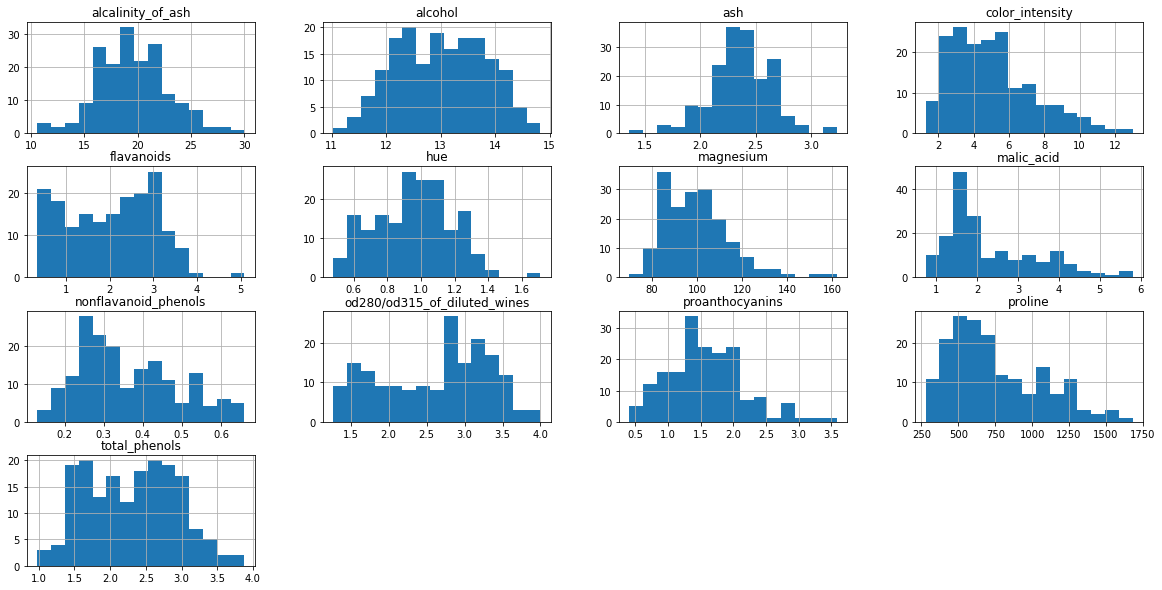

In [10]:
# Your code here:
wine_df.hist(bins=15, figsize=(20,10))
plt.show()

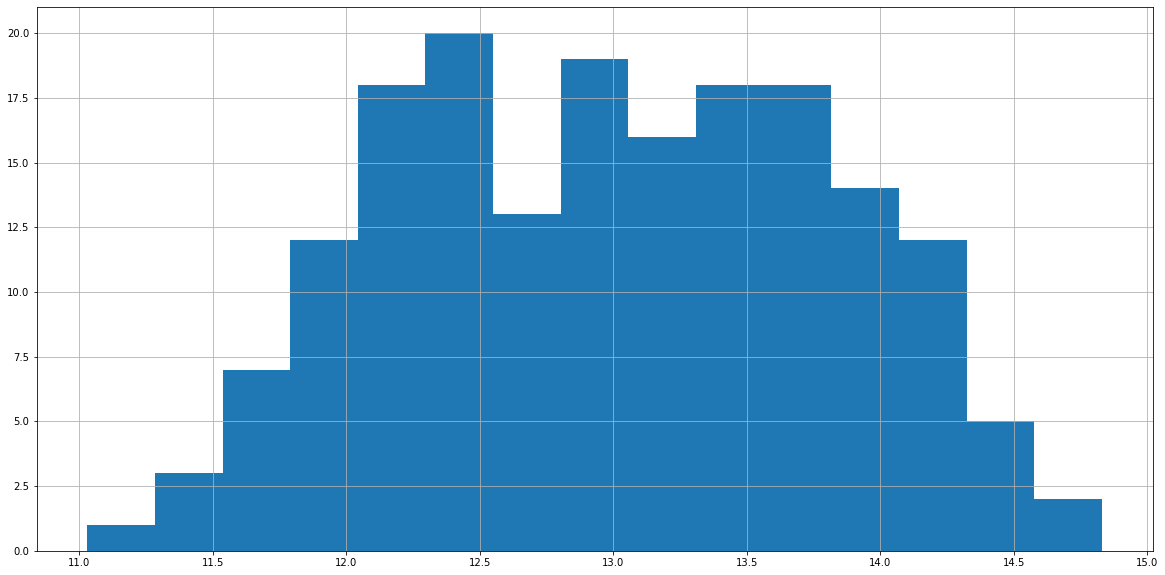

In [11]:
wine_df['alcohol'].hist(bins=15, figsize=(20,10))
plt.show()

# Challenge 2 - Clustering the Internal Dataset

In this portion of the lab, we will cluster the data to find common traits between the different wines. We will use the k-means clustering algorithm to achieve this goal.

#### We start by importing k-means from scikit-learn and then proceed to create 4 clusters.

In [12]:
# imports
# already imported above with other modules

In [13]:
# Your code here:
k_means= KMeans(n_clusters=4)

In [14]:
k_means.fit(wine_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Print the cluster labels.

In [15]:
# Your code here:
labels_list = k_means.labels_

labels_list

array([1, 1, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 0, 0,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0])

#### Compute the size of each cluster. This can be done by counting the number of occurrences of each unique label in the list above.

Which is the largest cluster of the 4?

### Method 1 : with Pandas DF

In [16]:
# Your code here:
wine_df['k_means_labels'] = k_means.labels_

In [17]:
wine_df['k_means_labels'].value_counts()

0    59
2    57
1    39
3    23
Name: k_means_labels, dtype: int64

### Method 2 : with Dict

In [18]:
unique, counts = np.unique(labels_list, return_counts = True)

In [19]:
dict_label = dict(zip(unique, counts))

In [20]:
dict_label

{0: 59, 1: 39, 2: 57, 3: 23}

In [21]:
# Your answer here:
# The largest cluster is Label 0

#### Inspect the shape of `wine['data']`

In [22]:
# Shape of the original Dict
wine['data'].shape

(178, 13)

In [23]:
# Shape of the DF with the additional K_means_label column,
wine_df.shape

(178, 14)

#### Inspect the first 5 records in `wine['data']`

In [24]:
# Your code here:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,k_means_labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


You now know the data object is a 2-dimensional array in which there are 178 rows and 13 columns. Each row is a data record and each column is a feature.

#### What is the average ash content for each cluster? 

*Hints:* 

* *Ash* is the 3rd column.

* The data object is not a Pandas dataframe so you can't apply `pandas.DataFrame.groupby`. Instead, you can use `np.average`.

In [25]:
# for loop version
list_ash = []
for i in range(len(wine['data'])):
    list_ash.append(wine['data'][i][2])

In [26]:
#list comprehension version
list_ash_comp = [wine['data'][i][2] for i in range(len(wine['data']))]

In [27]:
np.average(list_ash)

2.3665168539325845

In [28]:
# list_ash_label0 = []
# list_ash_label1 = []
# list_ash_label2 = []
# list_ash_label3 = []

# for i in range(len(wine['data'])):
#     if wine['data'][i][2] == 0:
#         list_ash_label0 = []

In [29]:
# Your code here:
list_ash_label0 = []
list_ash_label1 = []
list_ash_label2 = []
list_ash_label3 = []

for i in range(len(wine['data'])):
    ash_lab = wine['data'][i][2]
    if labels_list[i] == 0:
        list_ash_label0.append(ash_lab)
    if labels_list[i] == 1:
        list_ash_label1.append(ash_lab)
    if labels_list[i] == 2:
        list_ash_label2.append(ash_lab)
    if labels_list[i] == 3:
        list_ash_label3.append(ash_lab)

In [30]:
avg_0 = np.average(list_ash_label0)
avg_1 = np.average(list_ash_label1)
avg_2 = np.average(list_ash_label2)
avg_3 = np.average(list_ash_label3)

In [31]:
print(f'the average of list 0 is {avg_0}')
print(f'the average of list 1 is {avg_1}')
print(f'the average of list 2 is {avg_2}')
print(f'the average of list 3 is {avg_3}')

the average of list 0 is 2.3793220338983043
the average of list 1 is 2.390769230769231
the average of list 2 is 2.28
the average of list 3 is 2.5069565217391307


#### Method with DF (way easier ^^)

In [32]:
ash_df = wine_df.groupby('k_means_labels').agg('mean')

In [33]:
for idx, val in enumerate( ash_df['ash']):
    print('the average of ash list',idx, 'is' ,val)

the average of ash list 0 is 2.3793220338983043
the average of ash list 1 is 2.3907692307692305
the average of ash list 2 is 2.2800000000000007
the average of ash list 3 is 2.5069565217391307


# Challenge 3 - Load and Explore an External Dataset

We will now load an external dataset using Pandas and use scikit learn to explore the data. In this portion of the lab, we will use a [patient dataset from Kaggle](https://www.kaggle.com/miles99/patient-admission-dataset-for-learning-data-mining). 

In [35]:
patients = pd.read_csv(r'E:\Ironhack\IronHack_Classes\Week 7\Lab_7\lab-unsupervised-learning-and-sklearn\data\patient-admission-dataset-for-learning-data-mining.csv')

In the next cell, print the first five rows of the data using the `head()` function.

In [36]:
# Your code here:
patients.head()

,id,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,False,True,59,176,8.200152e+09,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,False,True,77,186,NaN,Farris Robinet,12/7/2017,True,True,NaN,NaN
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,True,True,90,177,6.145594e+09,Kaspar Spitaro,10/5/2018,False,False,NaN,NaN
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,True,True,70,150,NaN,Rafferty Fowls,10/21/2018,False,True,NaN,NaN
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,False,True,82,140,4.804758e+08,Glenna MacNeachtain,11/15/2018,False,False,NaN,NaN


Next, print the column types and check which columns have been misclassified by pandas.

In [37]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
id                      1000 non-null int64
patient_name            1000 non-null object
patient_email           1000 non-null object
doctor_phone            1000 non-null object
patient_gender          1000 non-null object
patient_dob             1000 non-null object
patient_diabetic        1000 non-null bool
patient_allergic        1000 non-null bool
patient_weight_kg       1000 non-null int64
patient_height_sm       1000 non-null int64
patient_nhs_number      796 non-null float64
doctor_name             942 non-null object
appointment_date        1000 non-null object
patient_show            1000 non-null bool
is_regular_visit        1000 non-null bool
prescribed_medicines    512 non-null object
diagnosis               512 non-null object
dtypes: bool(4), float64(1), int64(3), object(9)
memory usage: 105.6+ KB


#### We can see that none of the date columns have been correctly classified. Also, some columns contain qualitative data that can be dropped.

First, transform the `patient_dob` and `appointment_date` columns to datetime using the `pd.to_datetime` function.

In [38]:
# Your code here:
patients['patient_dob'] = pd.to_datetime(patients['patient_dob'])

In [39]:
patients['appointment_date'] = pd.to_datetime(patients['appointment_date'])

Next, drop the `id`, `patient_name`, `patient_email`, `patient_nhs_number`, and `doctor_phone` columns. These are not quantitative columns and will not contribute to our analysis.

In [40]:
# Your code here:
patients.drop(columns=['id', 'patient_name', 'patient_email', 'patient_nhs_number', 'doctor_phone'], inplace=True)

Now we work on the missing data. Most ML algorithms will not perform as intended if there are missing data.

In the cell below, count how many rows contain missing data in each column. You should see three columns contain missing data:

* `doctor_name`: 58 missing data
* `prescribed_medicines`: 488 missing data
* `diagnosis`: 488 missing data

In [41]:
# Your code here:
patients.isnull().sum()

patient_gender            0
patient_dob               0
patient_diabetic          0
patient_allergic          0
patient_weight_kg         0
patient_height_sm         0
doctor_name              58
appointment_date          0
patient_show              0
is_regular_visit          0
prescribed_medicines    488
diagnosis               488
dtype: int64

The main issues are found in the `prescribed_medicines` and `diagnosis` columns. Can we simply drop these rows?

The answer is not yet. Because when there are missing data in these columns, it doesn't mean the data records are broken. Instead, it means no medication was prescribed and no diagnosis was recorded. Therefore, once we fill in the missing data these columns will be fine. But we'll revisit these columns and decide whether we will eventually drop them when we look at how many unique values are there in these categorical columns.  

For the `prescribed_medicines` column, fill the missing values with the value `no prescription`. For the `diagnosis` column, fill the missing values with `no diagnosis`.

*Hint: Use [`pandas.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).*

In [42]:
patients

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,NaN,NaN
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,NaN,NaN
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,NaN,NaN
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,2018-11-11,False,True,70,166,NaN,2018-01-12,True,False,NaN,NaN
996,Female,2018-10-29,False,True,52,154,Flossy Canlin,2017-12-12,True,True,NaN,NaN
997,Male,2018-01-11,True,True,91,182,Humfried Cartmel,2018-05-17,True,True,NaN,NaN
998,Male,2018-05-20,False,True,63,157,Farris Robinet,2017-12-15,True,True,IRON SUPPLEMENT,S6610


In [43]:
# Your code here:
patients['prescribed_medicines'] = patients['prescribed_medicines'].fillna('no_prescription')

In [44]:
# Your code here:
patients['diagnosis'] =patients['diagnosis'].fillna('no diagnosis')

In [45]:
patients

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,no_prescription,no diagnosis
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,no_prescription,no diagnosis
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,no_prescription,no diagnosis
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,no_prescription,no diagnosis
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,2018-11-11,False,True,70,166,NaN,2018-01-12,True,False,no_prescription,no diagnosis
996,Female,2018-10-29,False,True,52,154,Flossy Canlin,2017-12-12,True,True,no_prescription,no diagnosis
997,Male,2018-01-11,True,True,91,182,Humfried Cartmel,2018-05-17,True,True,no_prescription,no diagnosis
998,Male,2018-05-20,False,True,63,157,Farris Robinet,2017-12-15,True,True,IRON SUPPLEMENT,S6610


How about `doctor_name`? Since a doctor visit without a doctor name might not be meaningful, we will drop these rows.

In [46]:
# Your code here:
patients.dropna(inplace=True)

In [47]:
patients.isnull().sum()

patient_gender          0
patient_dob             0
patient_diabetic        0
patient_allergic        0
patient_weight_kg       0
patient_height_sm       0
doctor_name             0
appointment_date        0
patient_show            0
is_regular_visit        0
prescribed_medicines    0
diagnosis               0
dtype: int64

#### Another step in preprocessing that can be performed by scikit-learn is label encoding. 

We have 4 columns that are of `bool` type. We would like to convert them to an integer column containing either zero or one. We can do this using [scikit-learn's label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In the cell below, import the label encoder and encode the 4 boolean columns (*patient_diabetic*, *patient_allergic*, *patient_show*, *is_regular_visit*) with `0` and `1`. 

In [48]:
# Your code here:
from sklearn import preprocessing

In [49]:
le = preprocessing.LabelEncoder()

In [50]:
patients['patient_diabetic'] = le.fit_transform(patients['patient_diabetic'])

patients['patient_allergic'] = le.fit_transform(patients['patient_allergic'])

patients['patient_show'] = le.fit_transform(patients['patient_show'])

patients['is_regular_visit'] = le.fit_transform(patients['is_regular_visit'])


In [51]:
patients

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,0,1,59,176,Sarena Waliszek,2018-05-01,1,1,triamcinolone acetonide,I669
1,Female,2018-02-08,0,1,77,186,Farris Robinet,2017-12-07,1,1,no_prescription,no diagnosis
2,Female,2018-10-09,1,1,90,177,Kaspar Spitaro,2018-10-05,0,0,no_prescription,no diagnosis
3,Male,2018-09-10,1,1,70,150,Rafferty Fowls,2018-10-21,0,1,no_prescription,no diagnosis
4,Female,2018-02-26,0,1,82,140,Glenna MacNeachtain,2018-11-15,0,0,no_prescription,no diagnosis
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Female,2018-02-06,1,0,108,157,Cissy Markey,2018-05-10,1,1,no_prescription,no diagnosis
996,Female,2018-10-29,0,1,52,154,Flossy Canlin,2017-12-12,1,1,no_prescription,no diagnosis
997,Male,2018-01-11,1,1,91,182,Humfried Cartmel,2018-05-17,1,1,no_prescription,no diagnosis
998,Male,2018-05-20,0,1,63,157,Farris Robinet,2017-12-15,1,1,IRON SUPPLEMENT,S6610


Print the data dtypes to confirm those four `bool` columns are converted to `int64`.

In [52]:
# Your code here:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 12 columns):
patient_gender          942 non-null object
patient_dob             942 non-null datetime64[ns]
patient_diabetic        942 non-null int64
patient_allergic        942 non-null int64
patient_weight_kg       942 non-null int64
patient_height_sm       942 non-null int64
doctor_name             942 non-null object
appointment_date        942 non-null datetime64[ns]
patient_show            942 non-null int64
is_regular_visit        942 non-null int64
prescribed_medicines    942 non-null object
diagnosis               942 non-null object
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 95.7+ KB


#### The last step is to handle the `object` data.

There are 4 `object` columns now: `patient_gender`, `doctor_name`, `prescribed_medicines`, and `diagnosis`. The gender columns

In the next cell, check the unique values of each of the `object` columns using `value_counts()`.

In [79]:
patients.nunique()

patient_diabetic       2
patient_allergic       2
patient_weight_kg     61
patient_height_sm     51
patient_show           2
is_regular_visit       2
diagnosis_int          2
patient_gender_int     2
labels                 4
dtype: int64

In [53]:
# Your code here:
patients[['patient_gender', 'doctor_name', 'prescribed_medicines', 'diagnosis']].apply('nunique').sort_values(ascending=False)

diagnosis               485
prescribed_medicines    395
doctor_name              19
patient_gender            2
dtype: int64

In [54]:
corr = patients.corr()

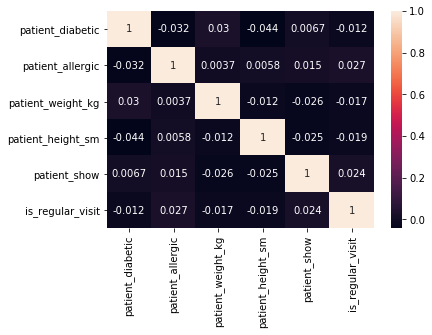

In [55]:
sns.heatmap(corr, annot=True)

#### The number of unique values is large for all three columns except `patient_gender`. We will handle these columns differently.

For `diagnosis`, there are too many unique values which will make ML difficult. However, we can re-encode the values to either with or without diagnosis. Remember at an earlier step we filled in the missing values of this column with *no diagnosis*? We can re-encode *no diagnosis* to `0` and all other values to `1`. In this way we can tremendously simply this column.

For `prescribed_medicines`, we can drop this column because it is perfectly correlated with `diagnosis`. Whenever there is no diagnosis, there is no prescribed medicine. So we don't need to keep this duplicated data.

How about `doctor_name`? There are not excessive unique values but still quite many (19). We may either drop or keep it but keeping it will make the analysis more complicated. So due to the length of this lab let's drop it.

How about `gender`? This one is easy. Just like re-encoding the boolean values, we can re-encode gender to `0` and `1` because there are only 2 unique values.

In the next cells, do the following:

1. Create a new column called `diagnosis_int` that has `0` and `1` based on the values in `diagnosis`.

1. Create a new column called `patient_gender_int` that has `0` and `1` based on the values in `patient_gender`.

1. Drop the following columns: `doctor_name`, `diagnosis`, `prescribed_medicines`, and `patient_gender`.

In [56]:
patients2 = patients.copy()

In [57]:
patients['diagnosis_int'] = np.where(patients['diagnosis'].str.contains('no diagnosis'),0,1)

In [58]:
patients['patient_gender_int'] = le.fit_transform(patients2['patient_gender'])

In [59]:
patients.columns

Index(['patient_gender', 'patient_dob', 'patient_diabetic', 'patient_allergic',
       'patient_weight_kg', 'patient_height_sm', 'doctor_name',
       'appointment_date', 'patient_show', 'is_regular_visit',
       'prescribed_medicines', 'diagnosis', 'diagnosis_int',
       'patient_gender_int'],
      dtype='object')

In [60]:
patients.drop(columns=['doctor_name', 'diagnosis', 'prescribed_medicines', 'patient_gender'], inplace=True)

In [61]:
####Test to check

In [62]:
# Your code here:
# patients2['diagnosis_int'] = le.fit_transform(patients['diagnosis'])

In [76]:
# conditions = patients['diagnosis'].str.contains('no diagnosis')
# patients2['diagnosis_int'] = np.select(condlist=conditions, choicelist=0, default=1)

Let's look at the head again to ensure the re-encoding and dropping are successful:

In [64]:
# Your code here:
patients.head()

,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,appointment_date,patient_show,is_regular_visit,diagnosis_int,patient_gender_int
0,2018-10-18,0,1,59,176,2018-05-01,1,1,1,0
1,2018-02-08,0,1,77,186,2017-12-07,1,1,0,0
2,2018-10-09,1,1,90,177,2018-10-05,0,0,0,0
3,2018-09-10,1,1,70,150,2018-10-21,0,1,0,1
4,2018-02-26,0,1,82,140,2018-11-15,0,0,0,0


An interesting observation is that all patients are no older than 2 years. However, their weights and heights indicate that they are adults. This cannot be true. Therefore, we can either trust the weight and height columns or the DOB column. Since there are other columns that indicate that these are adults (they have emails, some have diabetes) we will drop the `patient_dob` column. We will also drop the `appointment_date` column since it has too many unique values to transform to a dummy variable. Drop the two columns in the cell below.

In [65]:
# Your code here:
patients.drop(columns=['patient_dob','appointment_date'], inplace=True)

#### Our data is now ready for clustering. Let's use k-means again.

We start by initializing and fitting a model in the cell below. Call this model patients_cluster.

In [66]:
# Your code here:
patients_cluster = KMeans(n_clusters=4)

In [67]:
patients_cluster.fit(patients)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Attach the labels to the dataframe. Do this by accessing the `labels_` in the `patients_cluster` model and assign them to a new column in `patients` that you will call `labels`.

In [68]:
# Your code here:
patients['labels'] = patients_cluster.labels_

In [69]:
patients.head()

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,patient_gender_int,labels
0,0,1,59,176,1,1,1,0,3
1,0,1,77,186,1,1,0,0,3
2,1,1,90,177,0,0,0,0,1
3,1,1,70,150,0,1,0,1,0
4,0,1,82,140,0,0,0,0,2


Now using a `groupby`, find the mean of every variable in `patients` and group by the `labels` column. This summary will allow us to see how the patients differ between the clusters. Your output should look similar to the image below.

![groupby mean](../images/groupby-mean.png)

Additionally, add a comment to describe which columns have the largest difference between clusters.

In [70]:
# Your code here:
patients_groupby = patients.groupby('labels').mean()
patients_groupby

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,patient_gender_int
labels,,,,,,,,
0,0.506494,0.493506,65.432900,152.354978,0.510823,0.558442,0.506494,0.554113
1,0.490119,0.490119,94.003953,178.640316,0.505929,0.529644,0.513834,0.458498
2,0.552511,0.525114,97.557078,153.319635,0.488584,0.502283,0.593607,0.520548
3,0.510460,0.531381,62.832636,176.995816,0.472803,0.497908,0.451883,0.451883


In [71]:
# Your comment here:


# Bonus Challenge: Visualize K-Means Clusters

How did k-means cluster the data? You can obtain an intuitive view with a scatter plot. Generate a 2-d cluster plot below using `matplotlib`. You need to choose 2 of the features from your cleaned and transformed dataset, and use color to represent the cluster label generated from k-means.

If the scatter plot does not make any sense to you, it means the features you chose to visualize are not the right ones. You should be able to see 4 clear clusters with different colors in your visualization that suggests how k-means had clustered your data.

![Cluster Visualization](../images/clusters.png)

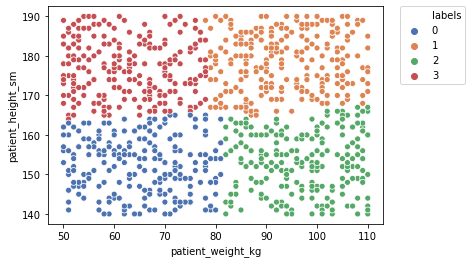

In [78]:
# Your code here:
plt.figure()
diverging_colors = sns.color_palette("deep", 4)
sns.scatterplot(x='patient_weight_kg' ,y='patient_height_sm' , data = patients, hue='labels', palette=diverging_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Additionally, you can visualize the clusters in 3-D scatter plot. Give it a try below.

In [73]:
from mpl_toolkits.mplot3d import Axes3D

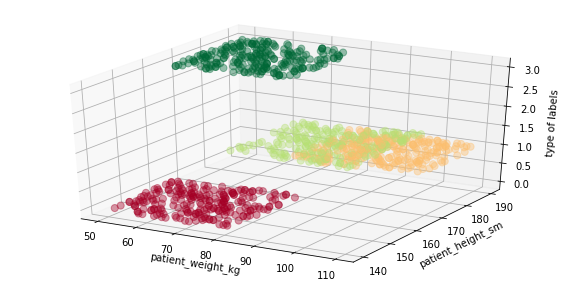

In [74]:
# Your code here:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

x = patients['patient_weight_kg']
y = patients['patient_height_sm']
z = patients['labels']
ax.scatter(x,y,z, s=50, c=patients['labels'], cmap='RdYlGn', alpha=0.4)

ax.set_xlabel('patient_weight_kg')
ax.set_ylabel('patient_height_sm')
ax.set_zlabel('type of labels')

plt.show()